In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

dataset_path = r"C:\Users\RKA\Desktop\GEU DEHRADUN\Plant Disease Research\Rice\rice leaf diseases dataset"

# Step 1: Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    # Ensure this matches the input shape for VGG16
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    # Ensure consistency for validation set
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 2: Load the pre-trained VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Freeze the base model layers to prevent updating during training
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Add custom layers on top of the pre-trained model using functional API
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Pass inputs to the base model
x = Flatten()(x)                        # Flatten the output
x = Dense(512, activation='relu')(x)     # Fully connected layer with 512 units
x = Dropout(0.5)(x)                      # Dropout for regularization
outputs = Dense(6, activation='softmax')(x)  # Output layer with 4 units (one for each class)

model = Model(inputs, outputs)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Multi-class classification
              metrics=['accuracy'])

# Step 6: Print the model summary to verify
model.summary()


Found 3748 images belonging to 4 classes.
Found 936 images belonging to 4 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562,308 (105.14 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

C:\Users\RKA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6166 - loss: 0.8853

C:\Users\RKA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 790s 7s/step - accuracy: 0.6173 - loss: 0.8837 - val_accuracy: 0.7985 - val_loss: 0.4834
Epoch 2/15
  1/117 ━━━━━━━━━━━━━━━━━━━━ 9:31 5s/step - accuracy: 0.7188 - loss: 0.5937

C:\Users\RKA\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7188 - loss: 0.5937 - val_accuracy: 0.7500 - val_loss: 0.3603
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 671s 6s/step - accuracy: 0.8221 - loss: 0.4668 - val_accuracy: 0.8556 - val_loss: 0.3741
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8125 - loss: 0.4216 - val_accuracy: 0.8750 - val_loss: 0.3452
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 805s 7s/step - accuracy: 0.8487 - loss: 0.3784 - val_accuracy: 0.8653 - val_loss: 0.3330
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8438 - loss: 0.3370 - val_accuracy: 0.8750 - val_loss: 0.3621
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 727s 6s/step - accuracy: 0.8534 - loss: 0.3709 - val_accuracy: 0.8578 - val_loss: 0.3527
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9375 - loss: 0.1830 - val_accuracy: 0.8750 - val_loss: 0.2601
Epoch 9/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 678s 6s/step - accuracy: 0.8886 - loss: 0.3006 - val_accuracy: 0.882

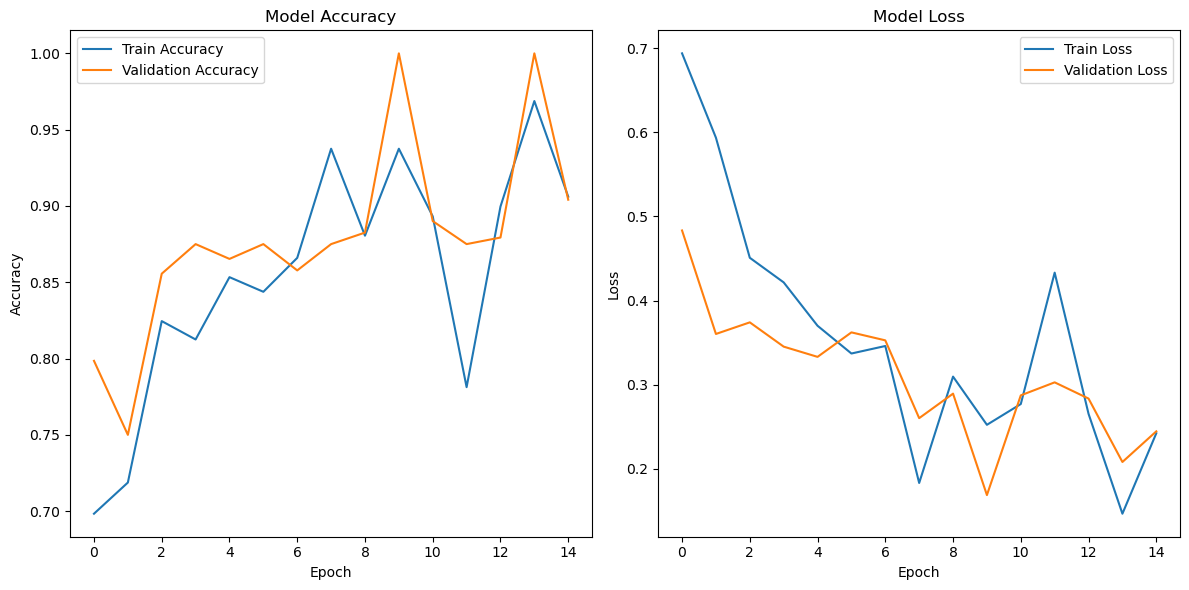

In [2]:
# Step 7: Train the model
epochs = 15  # You can adjust the number of epochs based on your requirements
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

# Step 8: Evaluate the model on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Step 9: Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 10: Add a testing function
def predict_disease(image_path, model, class_indices):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = {v: k for k, v in class_indices.items()}[predicted_class_index]
    predicted_probability = np.max(predictions)
    
    return f"Predicted Disease: {predicted_class_label}, Probability: {predicted_probability:.2f}"

# Retrieve class indices from the training generator
class_indices = train_generator.class_indices

# Test the model with an example image
test_image_path = r"C:\Users\RKA\Desktop\GEU DEHRADUN\Plant Disease Research\Rice\test_image.jpg"
result = predict_disease(test_image_path, model, class_indices)
print(result)
